# Análisis Exploratorio de la Data de Productos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import skew


from src.decorators.decorators import timeit,logit


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

# Descargar recursos necesarios para NLTK (ejecutar una vez)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Cargamos los respectivos datos y los almacenamos en un dataframe. Previamente cargamos las librerías respectivas.

In [2]:
data_path="../data/raw/products.csv"
df=pd.read_csv(data_path)

Una vez cargados los datos limpios, procedemos a examinar la data de los productos por lo que primero verificaremos si no posee nulos y la estructura de cada variable

In [3]:
df.head()

,Producto,Descripcion,Precio,Farmacia
0,GRAMON MILLET,102 Vitamina C+Zinc Masticable C/12 Sobres-Caja,27.84,Fybeca
1,VITAMINA C+ZN,102 Vitamina C+Zn Comp.Efer Caja X 1Tub,6.11,Fybeca
2,ABECIDIN,Abecidin Gotas Orales 30Ml,6.35,Fybeca
3,ADECIL,Adecil Gotas Vitaminas Frasco 30Ml,4.80,Fybeca
4,ARCALION,Arcalion Tabs. 200 Mg. C/20 Caja,10.00,Fybeca


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Producto     90 non-null     object 
 1   Descripcion  90 non-null     object 
 2   Precio       90 non-null     float64
 3   Farmacia     90 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


In [5]:
df.isnull().sum()

Producto       0
Descripcion    0
Precio         0
Farmacia       0
dtype: int64

Nuestro dataframe contiene medicamentos con las siguientes variables a analizar:
* Producto: Contiene el nombre del producto. Esta variable es del tipo `string`.
* Descripción: Explica el producto. Es del tipo `string`.
* Farmacia: Corresponde a la farmacia de la cual proviene el medicamento. Es del tipo `string`.
* Precio: Corresponde al precio del producto. Es del tipo `float`.

### Medidas Estadísticas para cada variable

Para obtener las medidas estadísticas de cada variable tomemos en cuenta que depende del tipo de variable a analizar, por lo que crearemos dos funciones, una para obtener las medidas estadísticas de las variables numéricas y otra para las categóricas.

In [6]:

@logit
@timeit
def obtener_medidas_numericas(columna, df):
    print(f"MEDIDAS ESTADÍSTICAS PARA LA COLUMNA {columna}")
    promedio=df[columna].mean()
    print(f"El promedio de la columna es: {promedio}")
    mediana=df[columna].median()
    print(f"El 50% de los valores  son menores o iguales a : {mediana}")
    moda=df[columna].mode()[0]
    print(f"El valor que más se repite es : {moda}")
    cuartil_1=np.quantile(df[columna], .25)
    print(f"El 25% de los datos son menores o iguales a: {cuartil_1}")
    cuartil_3=np.quantile(df[columna], .75)
    print(f"El 75% de los datos son menores o iguales a: {cuartil_3}")
    rango_intercuartilico=cuartil_3-cuartil_1
    print(f"La dispersión del 50% central de los datos o el rango intercuartílico es: {rango_intercuartilico}")
    maximo=max(df[columna])
    print(f"El valor más alto es: {maximo}")
    minimo=min(df[columna])
    print(f"El valor más bajo es: {minimo}")
    varianza=round(np.var(df[columna], ddof = 1),2)
    print(f"La varianza de los datos es: {varianza}")
    cv = round((np.sqrt(varianza) / promedio) * 100,2)
    print(f"El porcentaje del coeficiente de variación  es: {cv} ")
    asimetria = round(skew(df[columna]),2)
    print(f"El coeficiente de asimetria es: {asimetria} ")
    dic_medidas = {'Medida': ['Promedio', 'Mediana', 'Moda','Cuartil 1','Cuartil 3','Rango intercuartílico','Máximo','Mínimo','Varianza','Coef.variación','Asimetría'], 
                   'Valor': [promedio, mediana, moda,cuartil_1,cuartil_3,rango_intercuartilico,maximo,minimo,varianza,cv,asimetria]}
    tabla=pd.DataFrame(dic_medidas)
    return tabla


In [7]:
obtener_medidas_numericas('Precio',df)

2024-06-19 23:22:17,176-'INFO'-Corriendo wrapper
2024-06-19 23:22:17,184-'INFO'-obtener_medidas_numericas ejecutada en 0.0070 second
2024-06-19 23:22:17,186-'INFO'-Completado wrapper


MEDIDAS ESTADÍSTICAS PARA LA COLUMNA Precio
El promedio de la columna es: 20.757
El 50% de los valores  son menores o iguales a : 14.895
El valor que más se repite es : 51.24
El 25% de los datos son menores o iguales a: 5.545
El 75% de los datos son menores o iguales a: 24.975
La dispersión del 50% central de los datos o el rango intercuartílico es: 19.43
El valor más alto es: 136.0
El valor más bajo es: 1.92
La varianza de los datos es: 573.09
El porcentaje del coeficiente de variación  es: 115.33 
El coeficiente de asimetria es: 3.07 


,Medida,Valor
0,Promedio,20.757
1,Mediana,14.895
2,Moda,51.240
3,Cuartil 1,5.545
4,Cuartil 3,24.975
5,Rango intercuartílico,19.430
6,Máximo,136.000
7,Mínimo,1.920
8,Varianza,573.090
9,Coef.variación,115.330


Con respecto al Precio se puede decir que los medicamentos tienen un valor en promedio de $20.75, el 50% de los medicamentos cuestan menos o igual a $14,89. El precio más común es de $51.24. El valor más alto es de $136 y el más bajo es de $1.92. 
Hay una gran variabilidad en los precios, con una varianza de $573 y un coeficiente de variación alto de 115.30 .Esto implica que los valores individuales en la muestra o población pueden estar muy dispersos alrededor de la media.
La asimetría es positiva, con un valor de $3.07, lo que implica que hay más valores distintos a la derecha de la media.

In [8]:

@logit
@timeit
def obtener_medidas_categorias(df,columna):
    freq_abs = df[columna].value_counts()
    freq_rel = df[columna].value_counts(normalize=True)
    num_categories = df[columna].nunique()
    moda=df[columna].mode()[0]
    N=len(df[columna])
    frecuencias = pd.DataFrame({
        'Frecuencia Absoluta': freq_abs,
        'Frecuencia Relativa': freq_rel
    })
    
    # Crear un DataFrame con el número de categorías y moda
    resumen_valores = pd.DataFrame({
        'Número de Categorías': [num_categories],
        'Moda': [moda],
        'Entropía de Shanon':[-np.sum(freq_rel * np.log2(freq_rel))],
        'Índice de Simpson':[1 - np.sum((freq_abs * (freq_abs - 1)) / (N * (N - 1)))]
    })

    # Retornar los DataFrames
    return frecuencias,resumen_valores

   

In [9]:
obtener_medidas_categorias(df,'Producto')[0]

2024-06-19 23:22:17,248-'INFO'-Corriendo wrapper
2024-06-19 23:22:17,258-'INFO'-obtener_medidas_categorias ejecutada en 0.0080 second
2024-06-19 23:22:17,260-'INFO'-Completado wrapper


,Frecuencia Absoluta,Frecuencia Relativa
Producto,,
CEBIÓN,10,0.111111
BIOSIL,6,0.066667
BEE FARMA,6,0.066667
BIRM,5,0.055556
VITAMINA C+ZN,4,0.044444
CALCID,3,0.033333
CALCIO,3,0.033333
CALCIBON,3,0.033333
ANALGESICO,2,0.022222


In [10]:
obtener_medidas_categorias(df,'Producto')[1]

2024-06-19 23:22:17,296-'INFO'-Corriendo wrapper
2024-06-19 23:22:17,304-'INFO'-obtener_medidas_categorias ejecutada en 0.0060 second
2024-06-19 23:22:17,306-'INFO'-Completado wrapper


,Número de Categorías,Moda,Entropía de Shanon,Índice de Simpson
0,53,CEBIÓN,5.290596,0.973783


Con respecto a la variable Producto se tiene 53 categorías o 53 productos únicos, el medicamento más común es la Vitamina `CEBIÓN`. La entropía de Shanon es alta y el índice de Simpson es cercano a 1, lo que sugiere que  
 hay una gran diversidad en las categorías y que esta diversidad está bien distribuida entre las diferentes categorías.



In [11]:
obtener_medidas_categorias(df,'Farmacia')[0]

2024-06-19 23:22:17,344-'INFO'-Corriendo wrapper
2024-06-19 23:22:17,352-'INFO'-obtener_medidas_categorias ejecutada en 0.0060 second
2024-06-19 23:22:17,353-'INFO'-Completado wrapper


,Frecuencia Absoluta,Frecuencia Relativa
Farmacia,,
Cruz Azul,54,0.6
Fybeca,36,0.4


In [12]:
obtener_medidas_categorias(df,'Farmacia')[1]

2024-06-19 23:22:17,392-'INFO'-Corriendo wrapper
2024-06-19 23:22:17,401-'INFO'-obtener_medidas_categorias ejecutada en 0.0060 second
2024-06-19 23:22:17,402-'INFO'-Completado wrapper


,Número de Categorías,Moda,Entropía de Shanon,Índice de Simpson
0,2,Cruz Azul,0.970951,0.485393


Con respecto a la variable Farmacia se tiene 2 categorías o 2 únicas farmacias, la farmacia más común es `CRUZ AZUL`. La entropía de Shanon no es tan alta y el índice de Simpson no es tan cercano a 1, lo que sugiere que  
existe cierta diversidad en las categorías, el Índice de Simpson más bajo sugiere que 'Cruz Azul' tiene una proporción significativamente mayor en comparación con la otra categoría.

### Análisis Estadístico  de toda la data

In [13]:
productos_caros=df.nlargest(10,'Precio')
print(productos_caros)

         Producto                         Descripcion  Precio   Farmacia
70           BIRM        Birm Concentrado Cápsulas 90  136.00  Cruz Azul
71           BIRM      Birm Concentrado Jarabe 120 ml  126.00  Cruz Azul
48     ARAMANOSAR       Aramanosar Sobre Granulado 30  120.75  Cruz Azul
62         BIOSIL             Biosil Adults 50+ 630mg   51.24  Cruz Azul
63         BIOSIL                 Biosil Beauty 630mg   51.24  Cruz Azul
66         BIOSIL                  Biosil Cápsulas 60   51.24  Cruz Azul
65         BIOSIL                  Biosil Cápsulas 60   46.72  Cruz Azul
67         BIOSIL               Biosil En Gotas 30 ml   46.72  Cruz Azul
72  BIRM FAMILIAR  Birm Familiar Solución Oral 240 ml   45.00  Cruz Azul
68           BIRM                                Birm   42.00  Cruz Azul


In [14]:
productos_baratos=df.nsmallest(10,'Precio')
print(productos_baratos)

        Producto                                        Descripcion  Precio  \
24        ECUFOL                            Ecufol 100Mg Tabs F/100    1.92   
18       ROCNARF                    Complejo B Aci Foli Jarb 120 ml    2.27   
39  ACIDO FOLICO                        Acido Folico Mg Tableta 100    2.70   
55     BEE FARMA                            Bee Farma Vitamin 9g 10    3.07   
15     BEE FARMA     Chupete Pectina+Vitamina C Bee Farma C/10 Caja    3.11   
19       LAMOSAN                  Complejo B Lamosan Jbe. F/120 Ml.    3.36   
30        CEBIÓN                        Cebion Fresa Gotas F/30 Ml.    3.51   
54     BEE FARMA                         Bee Farma Vit C+zink 9g 10    3.58   
80        CALCIO  Calcio Minerales Calcio 12 3000 Ui 0.006 Suspe...    3.60   
17       ARISTON           Complejo B (Q.A.) Otc Grageas. C/20 Caja    3.80   

     Farmacia  
24     Fybeca  
18     Fybeca  
39  Cruz Azul  
55  Cruz Azul  
15     Fybeca  
19     Fybeca  
30     Fybeca  
54

El producto más caro es de la farmacia Cruz Azul con un precio de $136 y corresponde al Birm Concentrado Cápsulas 90, mientras que el más barato corresponde al  Ecufol 100Mg Tabs F/100 de la farmacia Fybeca con un precio de $1.92

In [15]:
data_fybeca=df[df['Farmacia']=='Fybeca']
productos_baratos=data_fybeca.nsmallest(10,'Precio')
print(productos_baratos)

      Producto                                     Descripcion  Precio  \
24      ECUFOL                         Ecufol 100Mg Tabs F/100    1.92   
18     ROCNARF                 Complejo B Aci Foli Jarb 120 ml    2.27   
15   BEE FARMA  Chupete Pectina+Vitamina C Bee Farma C/10 Caja    3.11   
19     LAMOSAN               Complejo B Lamosan Jbe. F/120 Ml.    3.36   
30      CEBIÓN                     Cebion Fresa Gotas F/30 Ml.    3.51   
17     ARISTON        Complejo B (Q.A.) Otc Grageas. C/20 Caja    3.80   
28   BEE FARMA    Caramelo Bee Farma Vit C + Zinc + Vit D C/30    4.38   
20  COMPLEVITA                          Complevita Gotas 30 Ml    4.40   
34   DECAFORTE                         Decaforte Jarabe 120 Ml    4.50   
13      CEBIÓN           Cebion Tabs. Eferv. 1Gr. Naranja T/10    4.64   

   Farmacia  
24   Fybeca  
18   Fybeca  
15   Fybeca  
19   Fybeca  
30   Fybeca  
17   Fybeca  
28   Fybeca  
20   Fybeca  
34   Fybeca  
13   Fybeca  


In [16]:
data_fybeca=df[df['Farmacia']=='Fybeca']
productos_caros=data_fybeca.nlargest(10,'Precio')
print(productos_caros)

         Producto                                      Descripcion  Precio  \
16           BAGÓ                Colnatur Classic Sobres C/30 Caja   39.90   
0   GRAMON MILLET  102 Vitamina C+Zinc Masticable C/12 Sobres-Caja   27.84   
32         CEBIÓN       Cebion Tab.Mast.Minis 100Mg C/10 Sobr Caja   26.40   
31         CEBIÓN       Cebion Tab.Mast. Mandarina 500Mg C/12 Caja   26.16   
33         CEBIÓN       Cebion Tab.Mast. Tropical 500Mg C/ 12 Caja   18.60   
27        BIOMOLE            Biomole C 12.5 G / 50 Ml X 50  Ml Iny   18.50   
10         CEBIÓN        Cebion Tab.Mast. Fresa 500 Mg. C/ 12 Caja   18.24   
11         CEBIÓN        Cebion Tab.Mast. Naranja 500Mg C/ 12 Caja   18.24   
25         EGOCYN                  Egogyn Caps. 1000 U.I C/30 Caja   17.40   
22    DAYAMINERAL              Dayamineral Tabs. 500 Mg. C/30 Caja   17.10   

   Farmacia  
16   Fybeca  
0    Fybeca  
32   Fybeca  
31   Fybeca  
33   Fybeca  
27   Fybeca  
10   Fybeca  
11   Fybeca  
25   Fybeca  
2

Dentro de la farmacia Fybeca el producto más caro es Colnatur Classic Sobres C/30 Caja con un precio de $39.90, mientras que el má barato es el Ecugol mencionado anteriormente.

In [17]:
data_cruz_azul=df[df['Farmacia']=='Cruz Azul']
productos_baratos=data_cruz_azul.nsmallest(10,'Precio')
print(productos_baratos)

        Producto                                        Descripcion  Precio  \
39  ACIDO FOLICO                        Acido Folico Mg Tableta 100    2.70   
55     BEE FARMA                            Bee Farma Vitamin 9g 10    3.07   
54     BEE FARMA                         Bee Farma Vit C+zink 9g 10    3.58   
80        CALCIO  Calcio Minerales Calcio 12 3000 Ui 0.006 Suspe...    3.60   
53     BEE FARMA                    Bee Farma Multivitam Cereza 90g    3.80   
84       CAL-COL                    Cal-col 1.5 Suspensiones 240 ml    4.00   
81        CALCIO  Calcio Minerales Calfokron Fresa Suspensión Or...    4.43   
83      CALCIVIT        Calcivit Fresa 500 Mg Tableta Masticable 24    4.80   
85      CALOIDAL       Caloidal 165mg 82mg 350 Ui Suspensión 200 ml    4.90   
47      APETITOL                                           Apetitol    4.99   

     Farmacia  
39  Cruz Azul  
55  Cruz Azul  
54  Cruz Azul  
80  Cruz Azul  
53  Cruz Azul  
84  Cruz Azul  
81  Cruz Azul  
83

In [18]:
data_cruz_azul=df[df['Farmacia']=='Cruz Azul']
productos_caros=data_cruz_azul.nlargest(10,'Precio')
print(productos_caros)

         Producto                         Descripcion  Precio   Farmacia
70           BIRM        Birm Concentrado Cápsulas 90  136.00  Cruz Azul
71           BIRM      Birm Concentrado Jarabe 120 ml  126.00  Cruz Azul
48     ARAMANOSAR       Aramanosar Sobre Granulado 30  120.75  Cruz Azul
62         BIOSIL             Biosil Adults 50+ 630mg   51.24  Cruz Azul
63         BIOSIL                 Biosil Beauty 630mg   51.24  Cruz Azul
66         BIOSIL                  Biosil Cápsulas 60   51.24  Cruz Azul
65         BIOSIL                  Biosil Cápsulas 60   46.72  Cruz Azul
67         BIOSIL               Biosil En Gotas 30 ml   46.72  Cruz Azul
72  BIRM FAMILIAR  Birm Familiar Solución Oral 240 ml   45.00  Cruz Azul
68           BIRM                                Birm   42.00  Cruz Azul


En la farmacia Cruz Azul el producto más caro es el Birm Concentrado, mientras que el má barato es el Acido Folico Mg Tableta 100 con un precio de  $2.70.

Procederemos a realizar un análisis de texto usando lenguaje natural sobre la descripciones de los productos para determinar las palabras que más se repiten.

In [19]:
# Función para preprocesamiento de texto
def limpieza_texto(text):
    # Convertir a minúsculas y eliminar caracteres no alfabéticos
    text = re.sub(r'\W+', ' ', text.lower())
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminación de stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Aplicar preprocesamiento y contar frecuencia de palabras
df['Tokens'] = df['Descripcion'].apply(limpieza_texto)

# Encontrar las palabras más frecuentes
all_words = [word for tokens in df['Tokens'] for word in tokens]
fdist = FreqDist(all_words)
print('Palabras más frecuentes:')
print(fdist.most_common(20))  # Imprimir las 10 palabras más frecuentes

Palabras más frecuentes:
[('c', 27), ('30', 23), ('ml', 17), ('caja', 15), ('cápsulas', 15), ('vitamina', 13), ('mg', 13), ('cebion', 10), ('tableta', 9), ('10', 8), ('12', 7), ('farma', 7), ('birm', 7), ('zinc', 6), ('tabs', 6), ('mast', 6), ('ui', 6), ('tab', 6), ('bee', 6), ('60', 6)]


Gracias al análisis por tokens podemos determinar que en la descripción  existen bastantes medicamentos que son soluciones orales o jarabes, puesto que la mayoría de descripciones contienen el término `ml`, otro detalle es que bastantes descripciones son pastillas o cápsulas puesto que 15 tokens corresponden al término `caja` , otros 13 corresponden a `mg` y otros 15 a `cápsulas`. 

También se puede observar que la mayoría de los medicamentos corresponden a vitaminas como cebión, que son masticables o que contienen zinc.

In [20]:
df=df[['Producto','Descripcion','Precio','Farmacia']]
filtered_df = df[df['Descripcion'].str.contains('ml', case=False)]
filtered_df.sort_values('Precio')

,Producto,Descripcion,Precio,Farmacia
18,ROCNARF,Complejo B Aci Foli Jarb 120 ml,2.27,Fybeca
19,LAMOSAN,Complejo B Lamosan Jbe. F/120 Ml.,3.36,Fybeca
30,CEBIÓN,Cebion Fresa Gotas F/30 Ml.,3.51,Fybeca
80,CALCIO,Calcio Minerales Calcio 12 3000 Ui 0.006 Suspe...,3.60,Cruz Azul
84,CAL-COL,Cal-col 1.5 Suspensiones 240 ml,4.00,Cruz Azul
20,COMPLEVITA,Complevita Gotas 30 Ml,4.40,Fybeca
81,CALCIO,Calcio Minerales Calfokron Fresa Suspensión Or...,4.43,Cruz Azul
34,DECAFORTE,Decaforte Jarabe 120 Ml,4.50,Fybeca
3,ADECIL,Adecil Gotas Vitaminas Frasco 30Ml,4.80,Fybeca
85,CALOIDAL,Caloidal 165mg 82mg 350 Ui Suspensión 200 ml,4.90,Cruz Azul


In [21]:
filtered_df = df[df['Descripcion'].str.contains('caja|m[gm]|cápsulas|tableta|tab[s]|mast', case=False, regex=True)]
filtered_df.sort_values('Precio')

,Producto,Descripcion,Precio,Farmacia
24,ECUFOL,Ecufol 100Mg Tabs F/100,1.92,Fybeca
39,ACIDO FOLICO,Acido Folico Mg Tableta 100,2.70,Cruz Azul
15,BEE FARMA,Chupete Pectina+Vitamina C Bee Farma C/10 Caja,3.11,Fybeca
17,ARISTON,Complejo B (Q.A.) Otc Grageas. C/20 Caja,3.80,Fybeca
13,CEBIÓN,Cebion Tabs. Eferv. 1Gr. Naranja T/10,4.64,Fybeca
83,CALCIVIT,Calcivit Fresa 500 Mg Tableta Masticable 24,4.80,Cruz Azul
85,CALOIDAL,Caloidal 165mg 82mg 350 Ui Suspensión 200 ml,4.90,Cruz Azul
9,CEBIÓN,Cebio Forte Vitamina C 1 Gr+Zinc 10 Tabs,5.68,Fybeca
12,CEBIÓN,Cebion Tabs. Calcio Eferv. T/10,6.00,Fybeca
1,VITAMINA C+ZN,102 Vitamina C+Zn Comp.Efer Caja X 1Tub,6.11,Fybeca


In [22]:
filtered_df = df[df['Descripcion'].str.contains('cebion|cebión', case=False, regex=True)]
filtered_df.sort_values('Precio')

,Producto,Descripcion,Precio,Farmacia
30,CEBIÓN,Cebion Fresa Gotas F/30 Ml.,3.51,Fybeca
13,CEBIÓN,Cebion Tabs. Eferv. 1Gr. Naranja T/10,4.64,Fybeca
12,CEBIÓN,Cebion Tabs. Calcio Eferv. T/10,6.00,Fybeca
29,CEBIÓN,Cebion Cebion Pack X 30,14.09,Fybeca
10,CEBIÓN,Cebion Tab.Mast. Fresa 500 Mg. C/ 12 Caja,18.24,Fybeca
11,CEBIÓN,Cebion Tab.Mast. Naranja 500Mg C/ 12 Caja,18.24,Fybeca
33,CEBIÓN,Cebion Tab.Mast. Tropical 500Mg C/ 12 Caja,18.60,Fybeca
31,CEBIÓN,Cebion Tab.Mast. Mandarina 500Mg C/12 Caja,26.16,Fybeca
32,CEBIÓN,Cebion Tab.Mast.Minis 100Mg C/10 Sobr Caja,26.40,Fybeca


La mayoría de los medicamentos que son Cebión pertenecen a la farmacia Fybeca y el más barato es el Cebion Fresa Gotas F/30 Ml con un precio de $3.51, mientras que el más caro es el Cebion Tab.Mast.Minis 100Mg C/10 Sobr Caja con un precio de $26.40

### Gráficas estadísticas y su interpretación

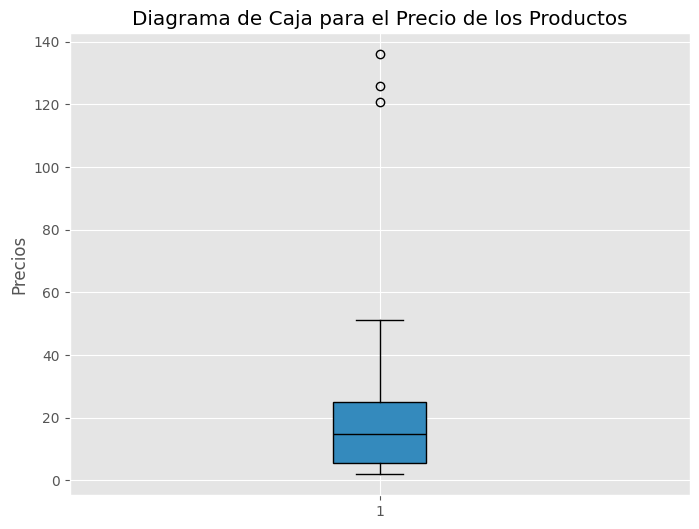

In [23]:
# Establecer el estilo de Matplotlib
plt.style.use('ggplot')

# Crear el diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot(df['Precio'], patch_artist=True, medianprops=dict(color='black'))

# Añadir título y etiquetas a los ejes
plt.title('Diagrama de Caja para el Precio de los Productos')
plt.ylabel('Precios')

# Mostrar el diagrama de caja
plt.show()

Existen datos que están muy por fuera de las barbas del diagrama de caja y corresponden a valores extremos o atípicos. Y eso se evidenció en el coeficiente de variación, en la curtosis y en la varianza muy alta de la variable Precio.

<Figure size 1000x600 with 0 Axes>

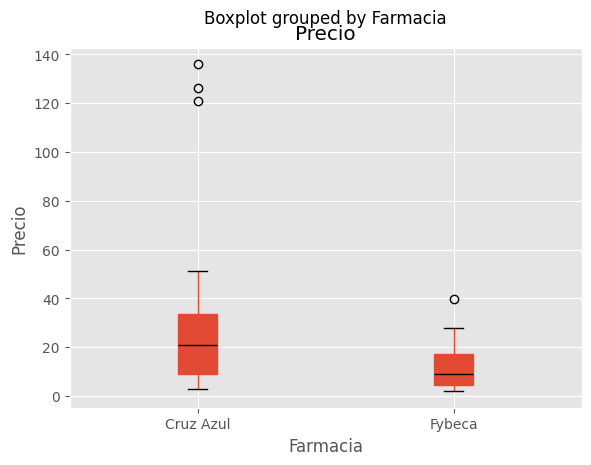

In [24]:
# Establecer el estilo de Matplotlib (opcional)
plt.style.use('ggplot')

# Crear una figura y ejes para el diagrama de caja
plt.figure(figsize=(10, 6))

# Agrupar los datos por 'Farmacia' y crear un diagrama de caja para cada grupo
boxplot = df.boxplot(column='Precio', by='Farmacia', patch_artist=True, medianprops=dict(color='black'))

plt.xlabel('Farmacia')
plt.ylabel('Precio')

# Mostrar el diagrama de caja
plt.show()

Podemos observar que los precios de la Farmacia Cruz Azul son más extremos que los de Fybeca, tomando en cuenta que hay más productos de Cruz Azul que Fybeca en nuestra data y esto se evidencia en la siguiente gráfica de pastel.
Los valores extremos de Fybeca no son tan grandes como los de Cruz Azul.

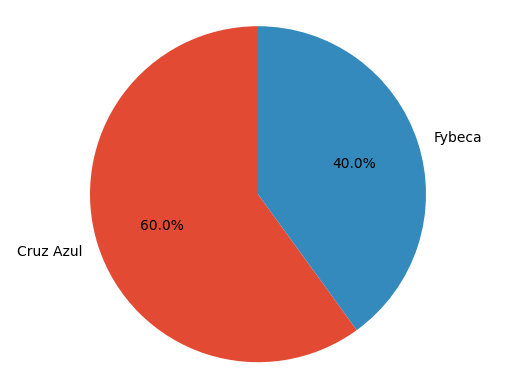

In [25]:
# Suponiendo que df es tu DataFrame y 'Farmacia' es la columna de interés
frecuencias = df['Farmacia'].value_counts()

# Preparar datos para el gráfico de pastel
valores = frecuencias.values
etiquetas = frecuencias.index

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar el gráfico de pastel
ax.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)

# Ajustes adicionales (opcional)
ax.axis('equal')  # Asegura que el gráfico de pastel sea un círculo en lugar de una elipse

# Mostrar el gráfico
plt.show()

Se puede observar que en nuestra base de datos el 60% de los productos pertenecen a Cruz Azul, mientras que el restante 40% son de Fybeca.

(array([46., 26.,  9.,  6.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([  1.92 ,  15.328,  28.736,  42.144,  55.552,  68.96 ,  82.368,
         95.776, 109.184, 122.592, 136.   ]),
 <BarContainer object of 10 artists>)

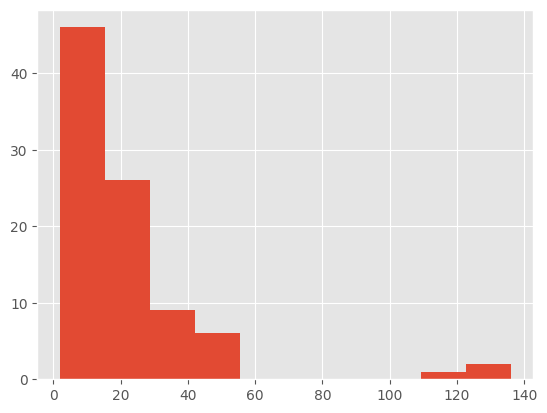

In [26]:
plt.hist(df['Precio'])

En el histograma de los precios se puede observar que la mayoría de los productos se encuentran distribuidos dentro del rango de precios que va de a 0 a 20 dólares y son muy pocos los que se distribuyen en los espacios que van de $20 en adelante. Esto implica que estamos ante productos farmaceúticos accesibles para el público. De igual manera en los diagramas de caja se evidenció la presencia de valores extremos, que corresponden a precios superiores a $100 y que de acuerdo al histograma presentado  son pocos.

(array([13.,  6.,  3.,  5.,  5.,  0.,  3.,  0.,  0.,  1.]),
 array([ 1.92 ,  5.718,  9.516, 13.314, 17.112, 20.91 , 24.708, 28.506,
        32.304, 36.102, 39.9  ]),
 <BarContainer object of 10 artists>)

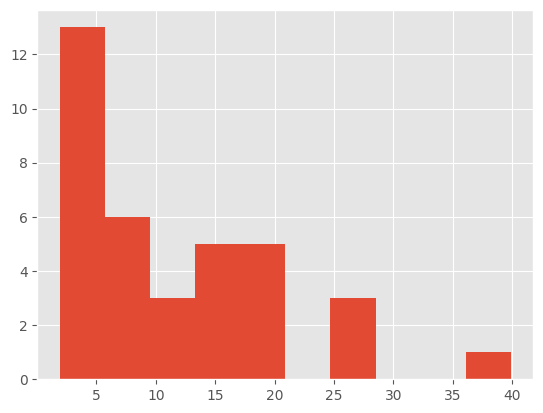

In [27]:
df_filtered=df[df['Farmacia']=='Fybeca']
plt.hist(df_filtered['Precio'])

(array([22., 15.,  8.,  6.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([  2.7 ,  16.03,  29.36,  42.69,  56.02,  69.35,  82.68,  96.01,
        109.34, 122.67, 136.  ]),
 <BarContainer object of 10 artists>)

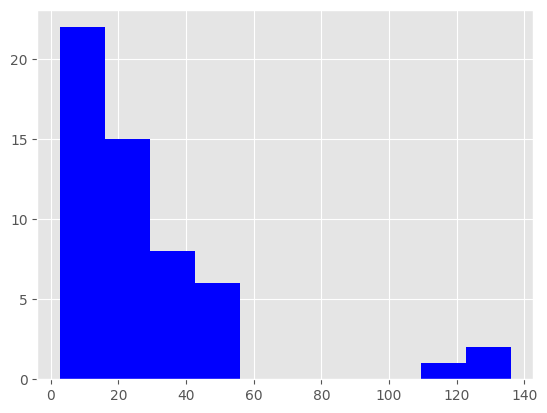

In [28]:
df_filtered=df[df['Farmacia']=='Cruz Azul']
plt.hist(df_filtered['Precio'],color='blue')

In [29]:
df=df.sort_values('Producto')


<Figure size 10500x3000 with 0 Axes>

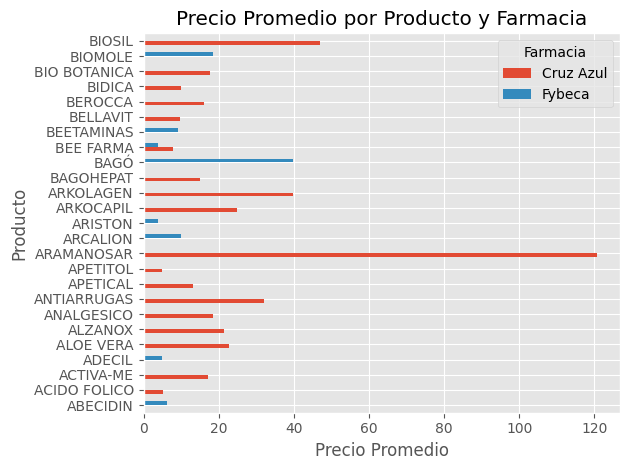

In [30]:
# Agrupar y usar unstack para obtener un DataFrame con Producto como índice y Farmacia como columnas

data1=df[:38]

df_grouped = data1.groupby(['Producto', 'Farmacia'])['Precio'].mean().unstack()

# Aumentar el tamaño de la figura a uno más razonable
plt.figure(figsize=(105, 30))

# Graficar los datos como gráfico de barras horizontales (barh)
df_grouped.plot(kind='barh', rot=0)

# Añadir título y etiquetas de los ejes
plt.title('Precio Promedio por Producto y Farmacia')
plt.xlabel('Precio Promedio')
plt.ylabel('Producto')

# Ajustar el diseño para evitar superposiciones de elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


<Figure size 10500x3000 with 0 Axes>

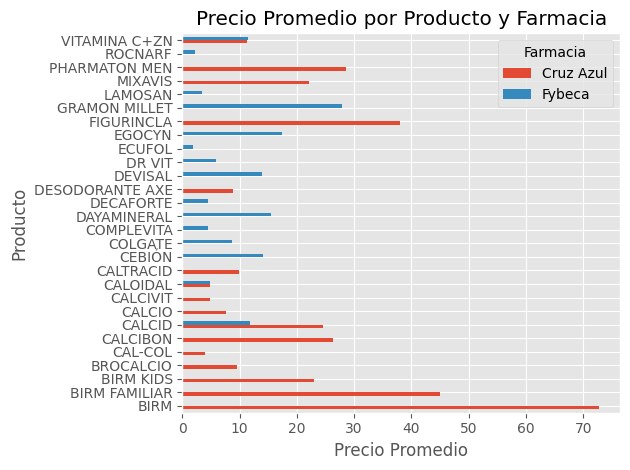

In [31]:
# Agrupar y usar unstack para obtener un DataFrame con Producto como índice y Farmacia como columnas

data1=df[38:]

df_grouped = data1.groupby(['Producto', 'Farmacia'])['Precio'].mean().unstack()

# Aumentar el tamaño de la figura a uno más razonable
plt.figure(figsize=(105, 30))

# Graficar los datos como gráfico de barras horizontales (barh)
df_grouped.plot(kind='barh', rot=0)

# Añadir título y etiquetas de los ejes
plt.title('Precio Promedio por Producto y Farmacia')
plt.xlabel('Precio Promedio')
plt.ylabel('Producto')

# Ajustar el diseño para evitar superposiciones de elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<BarContainer object of 90 artists>

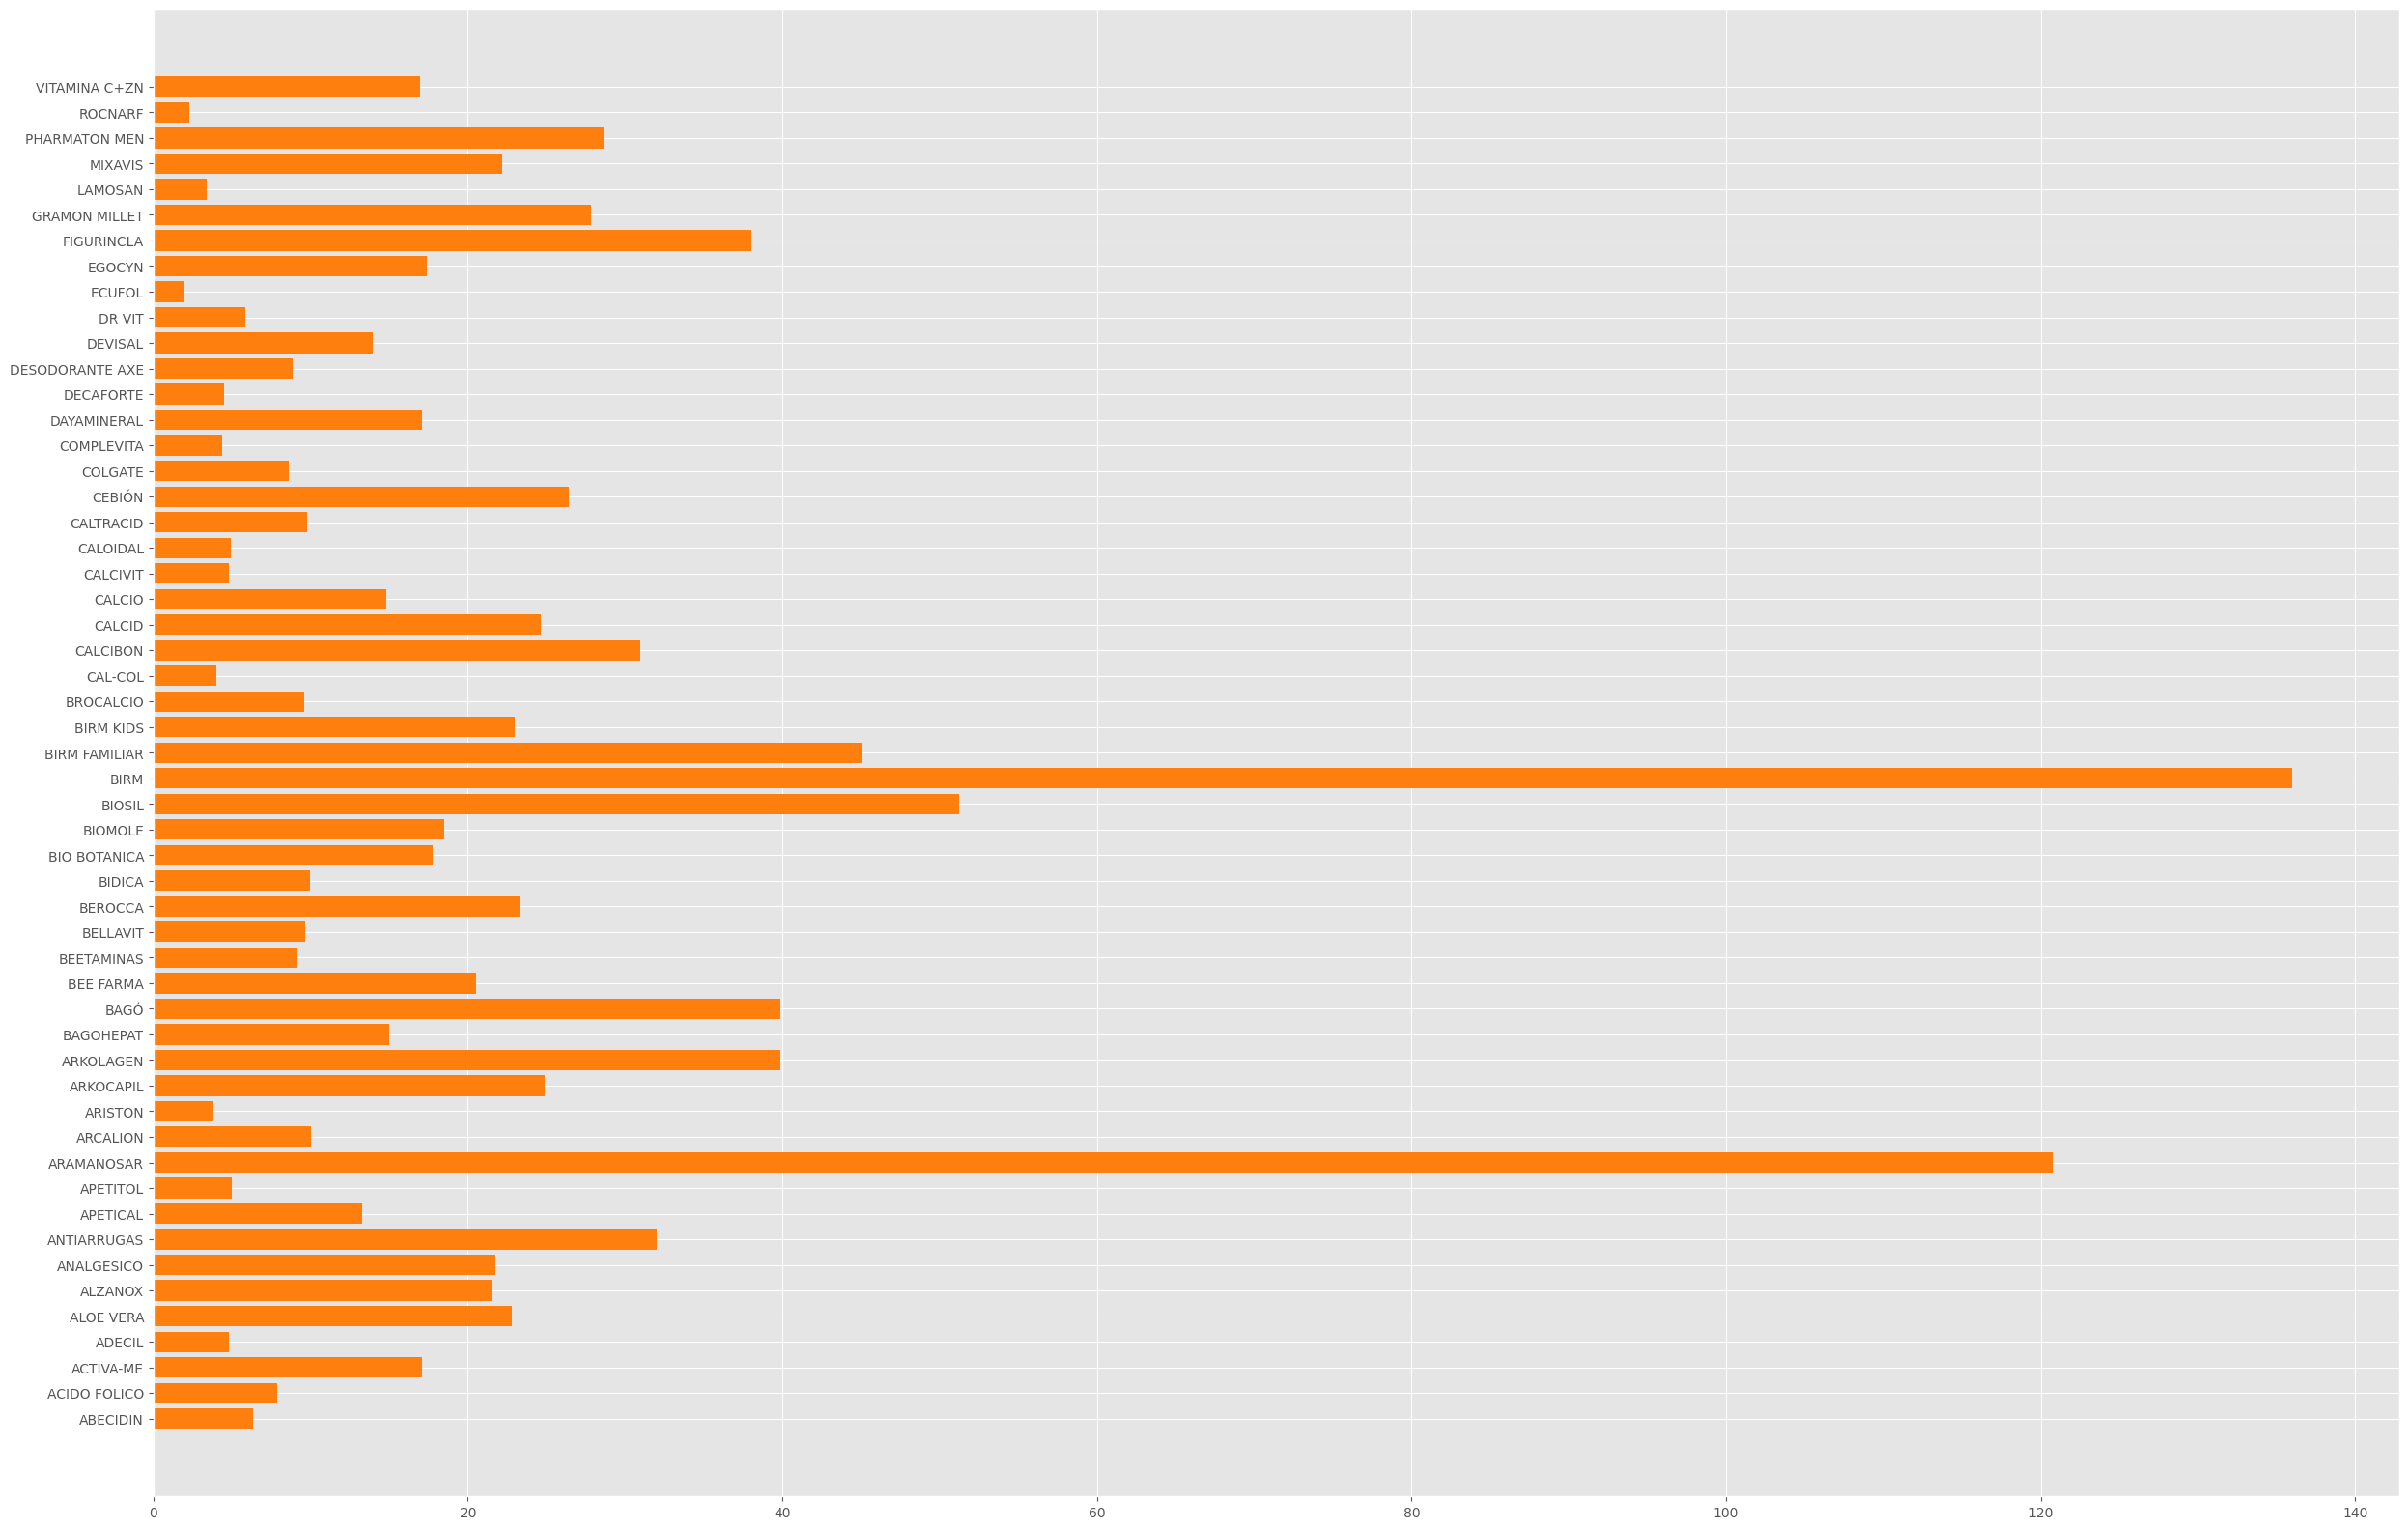

In [32]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(30, 20))


ax.barh(df['Producto'], df['Precio'], color = 'tab:orange')

Finalmente en estos gráficos de barras podemos observar que los medicamentos `ARAMANOSAR` y `BIRM` de fybeca son los más comunes. Y que el `BEE FARMA`, la `VITAMINA C+ZINC`, el `CALCID` o el `CALOIDAL` son los medicamentos que se pueden encontrar en ambas farmacias.